In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from random import randint

(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train_drawing = x_train
print("X_Train:",x_train[0])
print("Y_Train:",y_train[0])

print("X_Train Shape:",x_train.shape)
print("Y_Train Shape:",y_train.shape)


11490434/11490434 [==============================] - 0s 0us/step
X_Train: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0

In [2]:
imgsz = 784
x_test = x_test.reshape(x_test.shape[0],imgsz)
x_train = x_train.reshape(x_train.shape[0],imgsz)

print("X_Train Shape:",x_train.shape)
print("X_Test Shape:",y_test.shape)

num_classes = 10
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

X_Train Shape: (60000, 784)
X_Test Shape: (10000,)


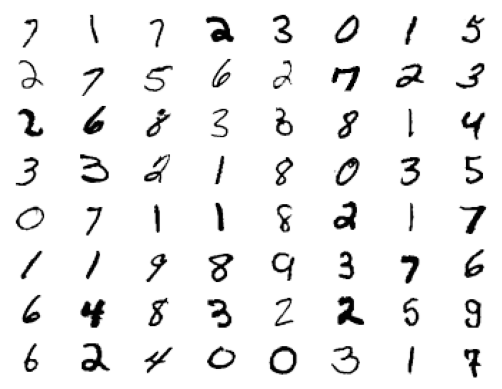

In [3]:
for i in range(64):
      ax = plt.subplot(8,8,i+1)
      ax.axis('off')
      plt.imshow(x_train_drawing[randint(0, x_train.shape[0])], cmap = 'Greys')


In [4]:
model = Sequential()
model.add(Dense(128, activation='sigmoid', input_shape=(imgsz,)))
model.add(Dense(128, activation='sigmoid', input_shape=(imgsz,)))
model.add(Dense(128, activation='sigmoid', input_shape=(imgsz,)))
model.add(Dense(128, activation='sigmoid', input_shape=(imgsz,)))
model.add(Dense(10, activation='sigmoid', input_shape=(imgsz,)))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 151,306
Trainable params: 151,306
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,y_train,batch_size=128,epochs=100,validation_split=0.1, verbose=True)
loss,accuracy = model.evaluate(x_test,y_test,verbose=True)

Epoch 1/100
422/422 [==============================] - 11s 9ms/step - loss: 2.3060 - accuracy: 0.1129 - val_loss: 2.2984 - val_accuracy: 0.1052
Epoch 2/100
422/422 [==============================] - 2s 5ms/step - loss: 2.2967 - accuracy: 0.1191 - val_loss: 2.2953 - val_accuracy: 0.1090
Epoch 3/100
422/422 [==============================] - 2s 4ms/step - loss: 2.2936 - accuracy: 0.1226 - val_loss: 2.2921 - val_accuracy: 0.1847
Epoch 4/100
422/422 [==============================] - 2s 4ms/step - loss: 2.2901 - accuracy: 0.1244 - val_loss: 2.2890 - val_accuracy: 0.1050
Epoch 5/100
422/422 [==============================] - 2s 4ms/step - loss: 2.2861 - accuracy: 0.1310 - val_loss: 2.2841 - val_accuracy: 0.1050
Epoch 6/100
422/422 [==============================] - 2s 4ms/step - loss: 2.2811 - accuracy: 0.1375 - val_loss: 2.2782 - val_accuracy: 0.1360
Epoch 7/100
422/422 [==============================] - 2s 4ms/step - loss: 2.2752 - accuracy: 0.1490 - val_loss: 2.2724 - val_accuracy: 0.167

In [6]:
loss,accuracy = model.evaluate(x_test,y_test,verbose=True)

313/313 [==============================] - 1s 2ms/step - loss: 0.2239 - accuracy: 0.9412


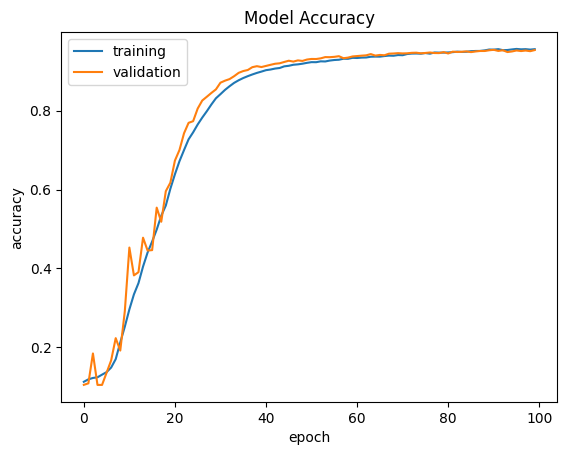

In [7]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['training','validation'], loc='best')
plt.show()


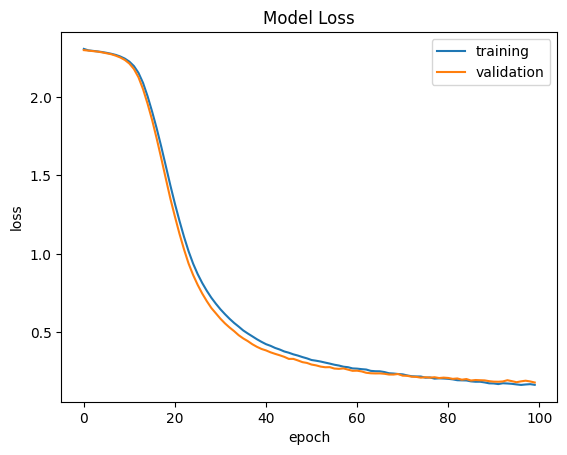

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training','validation'], loc='best')
plt.show()

In [9]:
y_pred = model.predict(x_test)

Y_pred = np.argmax(y_pred, 1) # Decode predicted labels
Y_test = np.argmax(y_test, 1) # Decode labels

313/313 [==============================] - 1s 3ms/step


In [10]:
mat = confusion_matrix(Y_test,Y_pred) # generating the confusion matrix
print(mat)

[[ 952    0    1    1    2    7   13    3    1    0]
 [   0 1111    6    1    0    0    1    0   16    0]
 [   4    2  966   12    3    3   20    3   17    2]
 [   0    0   20  929    0   33    0   10   18    0]
 [   0    0    1    0  920    0   17    1    4   39]
 [   8    0    0   28    1  824    5    6   16    4]
 [  14    2    6    0    9    8  917    0    2    0]
 [   2    0    9   10    0    3    0  948   19   37]
 [   3    5    8   14    8   13    2    7  911    3]
 [   2    2    0    3   23    7    2   13   23  934]]


In [11]:
import pickle
with open('ANN_Model.pkl','wb') as file:
  pickle.dump(model,file)